In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [4]:
import seaborn as sns
%reload_ext autoreload
%autoreload 2
#from my_utils.score import test_func , conf_matrix
from my_utils.print_lines import *

font = {'size'   : 14}
plt.rc('font', **font)

In [5]:
def conf_matrix(model ,x, oh_yt , plot=0):
    '''
    return confusion matrix
    Parameters :
        model -  Keras model
        x - test/training data
        oh_yt =  one hot encoded test labels
    '''
    y_pred_prob = model.predict(x)
    #y_pred=  [np.argmax(yi) for yi in y_pred]
    y_pred = []
    for yi in y_pred_prob:
        temp = [0]*len(yi)
        temp[np.argmax(yi)] = 1
        y_pred.append(temp)
    y_pred =  np.asarray(y_pred)
    #print(y)
    cf = np.matmul(oh_yt.T , y_pred)
    return cf

In [6]:
def class_to_int(label , cl):
    temp = []
    for i in range(len(label)):
        #print(label[i])
        for j in range(len(cl)):
            if(label[i]==cl[j]):
                temp.append(j) 
    return temp
classes = ['BH' ,'NS' ]

In [7]:
#display(data)
def filter_data(data):
    
    max_flux = 12
    min_flux = 26
    ob_id = np.arange(0,len(data))
    data.insert(0 , 'obs_id' , ob_id)
    data = data[data['flux_aper']>max_flux]
    data = data[data['flux_aper']<min_flux]
    data = data[data['flux_aper_lolim']<min_flux]
    data = data[data['flux_aper_hilim']>(max_flux-2)]
    data = data[data['significance']>5]
    
    data = data.sample(frac=1)
    #display(data)
    data_class = data[['class']]
    data_id = data['src_id']
    data_name = data['src_name']
    obs_id = data['obs_id']
    data_val = data.drop(columns=['index' , 'livetime' , 'gti_obs' , 'significance' , 'likelihood' , 'class' ,'src_id' ,'src_name' , 'obs_id'])
    data_sig = data[['significance']]
    #display(data_val)
    import missingno as msno
    #msno.matrix(data_val)
    #plt.show()

    data_val = data_val.replace(np.nan , 0)
    data = data.replace(np.nan , 0 )
    for d in data_val:
        mean = np.mean(data_val[d])
        var = np.var(data_val[d])
        data_val[d] = (data_val[d]-mean)/var
        data_val[d] = data_val[d] / np.amax(data_val[d])
    #msno.matrix(data_val)
    #plt.show()
    
    #display(data_val)
    return data , data_val , data_class , data_id , data_sig , obs_id

In [8]:
model = keras.models.load_model('models/NN_NS_BH.mdl/')

2021-09-28 16:12:31.853537: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-28 16:12:31.853787: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-28 16:12:31.854862: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


(37, 2)


(30, 2)


2021-09-28 16:12:35.109029: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-28 16:12:35.129456: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1800000000 Hz


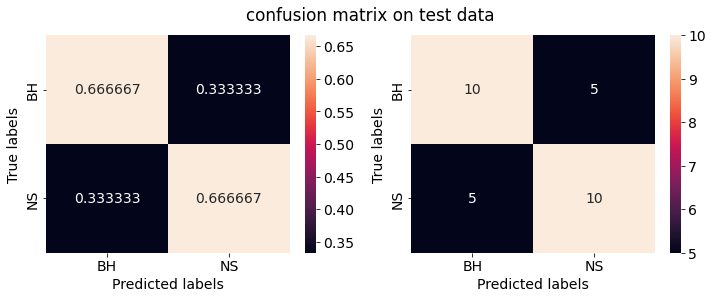

,obs_id,index,is_ok,class,pred_class,prob,src_id,src_name,livetime,significance,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
7,7,0,0,BH,NS,0.504536,BH0009,SAX J1819.3-2525,25256.9,26.51,...,0.000000,0.000000,0.000,0.000,0.000,0.000,0.0000,0.0000,0.0000,0.0
8,8,1,0,BH,NS,0.843562,BH0009,SAX J1819.3-2525,4256.0,26.51,...,0.000000,0.000000,0.000,0.000,0.000,0.000,0.0000,0.0000,0.0000,0.0
11,11,4,0,BH,NS,0.947932,BH0009,SAX J1819.3-2525,36445.9,26.51,...,0.000000,0.000000,0.000,0.000,0.000,0.000,0.0000,0.0000,0.0000,0.0
9,9,2,0,BH,NS,0.996109,BH0009,SAX J1819.3-2525,9209.3,26.51,...,12.302683,12.255160,0.000,81.320,9.731,5.142,3.9640,2.6820,1.4390,0.0
10,10,3,0,BH,NS,0.969289,BH0009,SAX J1819.3-2525,18284.8,26.51,...,0.000000,0.000000,0.000,0.000,0.000,0.000,0.0000,0.0000,0.0000,0.0
23,23,1,1,BH,BH,0.991382,BH0018,CXOU J100514.2-07423,75682.2,16.29,...,0.000000,0.000000,0.000,0.000,0.000,0.000,0.0000,0.0000,0.0000,0.0
27,27,5,1,BH,BH,0.990215,BH0018,CXOU J100514.2-07423,158013.8,16.29,...,0.000000,0.000000,0.000,0.000,0.000,0.000,0.0000,0.0000,0.0000,0.0
25,25,3,1,BH,BH,0.958518,BH0018,CXOU J100514.2-07423,75554.3,16.29,...,0.000000,0.000000,0.000,0.000,0.000,0.000,0.0000,0.0000,0.0000,0.0
28,28,6,1,BH,BH,0.986674,BH0018,CXOU J100514.2-07423,160215.7,16.29,...,0.000000,0.000000,0.000,0.000,0.000,0.000,0.0000,0.0000,0.0000,0.0
31,31,9,1,BH,BH,0.990335,BH0018,CXOU J100514.2-07423,46281.0,16.29,...,0.000000,0.000000,0.000,0.000,0.000,0.000,0.0000,0.0000,0.0000,0.0


In [9]:
test_bh = pd.read_csv('processed_data/BH_test.csv')
test_ns = pd.read_csv('processed_data/NS_test.csv')
test = pd.concat([test_bh , test_ns ] , axis=0)
test_data , t_val , t_class , t_id , t_sig , t_ob_id = filter_data(test)


params_used = []
for t in t_val:
    params_used.append(t)
params_used = np.asarray(params_used)

t_class_int = class_to_int(t_class.to_numpy(),  classes)
#y_test_int = class_to_int(y_test, classes)
one_hot_t_class =  to_categorical(t_class_int)
x_test = t_val.to_numpy()
#display(t_val.describe())
one_hot_y_test =  to_categorical(t_class_int)
print(one_hot_y_test.shape)
#for y_i , y_j in zip(y_train , one_hot_y_train):
##    print(y_i , y_j)



cf = conf_matrix(model , x_test, one_hot_y_test)
c = np.asarray([[ci /sum(c_row) for ci in c_row] for c_row in cf])
fig , ax = plt.subplots(nrows=1 , ncols=2 , figsize=(12,4)) 
#ax = 
sns.heatmap(c, annot=True, fmt='g', ax=ax[0]);  #annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cf, annot=True, fmt='g', ax=ax[1]); 
# labels, title and ticks
for a in ax:
    a.set_xlabel('Predicted labels')
    a.set_ylabel('True labels')
    #ax[0].set_title('Confusion Matrix Test Data'); 
    a.xaxis.set_ticklabels(['BH', 'NS']) 
    a.yaxis.set_ticklabels(['BH', 'NS'])
plt.suptitle('confusion matrix on test data')
plt.show()
plt.close()




test_data_result = test_data.copy(deep=True)
y_prob = model.predict(x_test)

y_pred = []
for yi in y_prob:
    temp = [int(0)]*len(yi)
    temp[np.argmax(yi)] = int(1)
    y_pred.append(temp)
y_pred =  np.asarray(y_pred)

y_prob_val = [np.amax(yi) for yi in y_prob]
y_prob_class =[classes[np.argmax(yi)] for yi in y_prob]
y_truth = [np.dot(yi , yt) for yi , yt in zip(y_pred , one_hot_y_test)]
y_truth = np.asarray(y_truth)
test_data_result.insert(3 ,'pred_class' , y_prob_class)
test_data_result.insert(4 ,'prob' , y_prob_val)
test_data_result.insert(2 ,'is_ok' , y_truth.astype(int))

test_data_result = test_data_result.sort_values(by='src_id' , axis=0)
test_data_result.drop(columns=['index'])
display(test_data_result)
test_data_result.to_csv('pred_result/NS_BH_test.csv')

## Feature Correlation

In [10]:
param_imp = pd.DataFrame()
param_imp.insert(0,'feat' ,params_used)

cl = 0
y_prob_c1 = y_prob[:,cl]
param_corr = []
for p in params_used:
    feat_val = t_val[p].to_numpy()
    corr = abs(np.corrcoef(feat_val , y_prob_c1)[0,1])
    param_corr.append(corr)
param_imp.insert(1,'corr_coef_BH' ,param_corr)

param_imp = param_imp.sort_values(by='corr_coef_BH' , axis = 0)
display(param_imp)
param_imp.to_csv('pred_result/param_imp_test.csv')

,feat,corr_coef_BH
70,hard_ms_hilim,0.045326
0,var_inter_sigma,0.061911
77,powlaw_nh_lolim,0.074296
10,var_index,0.110572
71,hard_ms_lolim,0.142504
...,...,...
67,hard_hm_lolim,0.554026
47,hard_hm,0.573843
12,flux_aper_lolim,0.659347
13,flux_aper,0.680435


(370, 2)


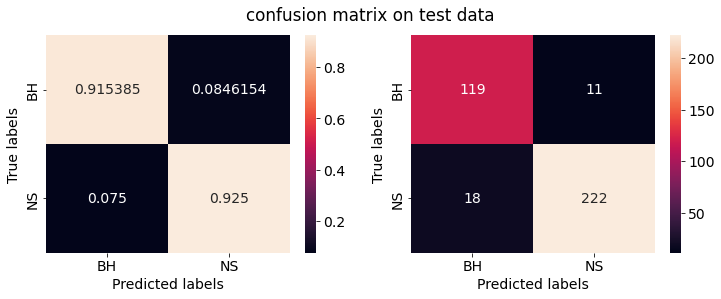

,obs_id,index,is_ok,class,pred_class,prob,src_id,src_name,livetime,significance,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
1,1,1,1,BH,BH,0.964299,BH0001,1A 0620-00,39623.0,23.63,...,13.433798,13.353400,3.134,2.0000,15.48,6.992,0.5002,0.4332,1.0350,0.00
0,0,0,0,BH,NS,0.918899,BH0001,1A 0620-00,41932.7,23.63,...,0.000000,0.000000,0.000,0.0000,0.00,0.000,0.0000,0.0000,0.0000,0.00
2,2,2,1,BH,BH,0.832268,BH0001,1A 0620-00,29673.9,23.63,...,13.083178,13.013990,4.313,2.7990,17.89,8.830,0.6263,0.5576,0.8602,0.00
3,3,0,1,BH,BH,0.923317,BH0003,GINGA 1354-645,39516.5,20.86,...,13.372737,13.236872,5.139,2.6140,76.58,54.170,0.7901,0.6270,35.2000,13.05
5,5,2,0,BH,NS,0.736341,BH0003,GINGA 1354-645,19803.6,20.86,...,0.000000,0.000000,0.000,0.0000,0.00,0.000,0.0000,0.0000,0.0000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,622,10,1,NS,NS,0.999996,NS0078,1WGA J1911.2+0035,6358.0,44.36,...,12.177244,12.126563,1.149,0.9172,44.32,36.520,0.3771,0.3348,25.7800,16.95
441,619,7,1,NS,NS,0.999997,NS0078,1WGA J1911.2+0035,6358.7,44.36,...,11.472370,11.449283,2.151,1.9080,41.05,37.540,0.5428,0.5153,14.5600,11.14
454,632,0,1,NS,NS,0.999688,NS0083,E2259+587,24783.0,114.17,...,11.891435,11.875170,1.525,1.4110,88.92,83.260,0.5262,0.5079,49.7400,44.93
455,633,0,1,NS,NS,0.989227,NS0084,GRO J1744-28,10619.0,5.50,...,0.000000,0.000000,0.000,0.0000,0.00,0.000,0.0000,0.0000,0.0000,0.00


In [11]:
test_bh = pd.read_csv('processed_data/BH_train.csv')
test_ns = pd.read_csv('processed_data/NS_train.csv')
test = pd.concat([test_bh , test_ns ] , axis=0)
test_data , t_val , t_class , t_id , t_sig , t_ob_id = filter_data(test)


t_class_int = class_to_int(t_class.to_numpy(),  classes)
#y_test_int = class_to_int(y_test, classes)
one_hot_t_class =  to_categorical(t_class_int)
x_test = t_val.to_numpy()
#display(t_val.describe())
one_hot_y_test =  to_categorical(t_class_int)
print(one_hot_y_test.shape)
#for y_i , y_j in zip(y_train , one_hot_y_train):
##    print(y_i , y_j)



cf = conf_matrix(model , x_test, one_hot_y_test)
c = np.asarray([[ci /sum(c_row) for ci in c_row] for c_row in cf])
fig , ax = plt.subplots(nrows=1 , ncols=2 , figsize=(12,4)) 
#ax = 
sns.heatmap(c, annot=True, fmt='g', ax=ax[0]);  #annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cf, annot=True, fmt='g', ax=ax[1]); 
# labels, title and ticks
for a in ax:
    a.set_xlabel('Predicted labels')
    a.set_ylabel('True labels')
    #ax[0].set_title('Confusion Matrix Test Data'); 
    a.xaxis.set_ticklabels(['BH', 'NS']) 
    a.yaxis.set_ticklabels(['BH', 'NS'])
plt.suptitle('confusion matrix on test data')
plt.show()
plt.close()




test_data_result = test_data.copy(deep=True)
y_prob = model.predict(x_test)

y_pred = []
for yi in y_prob:
    temp = [int(0)]*len(yi)
    temp[np.argmax(yi)] = int(1)
    y_pred.append(temp)
y_pred =  np.asarray(y_pred)

y_prob_val = [np.amax(yi) for yi in y_prob]
y_prob_class =[classes[np.argmax(yi)] for yi in y_prob]
y_truth = [np.dot(yi , yt) for yi , yt in zip(y_pred , one_hot_y_test)]
y_truth = np.asarray(y_truth)
test_data_result.insert(3 ,'pred_class' , y_prob_class)
test_data_result.insert(4 ,'prob' , y_prob_val)
test_data_result.insert(2 ,'is_ok' , y_truth.astype(int))

test_data_result = test_data_result.sort_values(by='src_id' , axis=0)
test_data_result.drop(columns=['index'])
display(test_data_result)
test_data_result.to_csv('pred_result/NS_BH_train.csv')

In [12]:
param_imp = pd.DataFrame()
param_imp.insert(0,'feat' ,params_used)

cl = 0
y_prob_c1 = y_prob[:,cl]
param_corr = []
for p in params_used:
    feat_val = t_val[p].to_numpy()
    corr = abs(np.corrcoef(feat_val , y_prob_c1)[0,1])
    param_corr.append(corr)
param_imp.insert(1,'corr_coef_BH' ,param_corr)

param_imp = param_imp.sort_values(by='corr_coef_BH' , axis = 0)
display(param_imp)
param_imp.to_csv('pred_result/param_imp_train.csv')

,feat,corr_coef_BH
18,photflux_aper_h,0.001301
68,hard_hs_hilim,0.004341
43,flux_aper_hilim_h,0.012605
23,photflux_aper_lolim_h,0.013167
28,photflux_aper_hilim_h,0.015487
...,...,...
45,flux_aper_hilim_u,0.261432
13,flux_aper,0.299734
14,photflux_aper_hilim,0.307210
30,photflux_aper_hilim_u,0.365176
